# **TUGAS BESAR**
### VISI KOMPUTER
#### Mendeteksi jenis kendaraan dengan menggunakan YOLOv5

### 1301180126//1301184049



## Extract Dataset

In [ ]:
!unzip -q /content/vehicle_dataset.zip

# Clone YOLOv5 & Install Depedencies

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd /content/yolov5

 # install dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 10537, done.
remote: Total 10537 (delta 0), reused 0 (delta 0), pack-reused 10537
Receiving objects: 100% (10537/10537), 10.73 MiB | 30.86 MiB/s, done.
Resolving deltas: 100% (7278/7278), done.
/content/yolov5
     |████████████████████████████████| 596 kB 34.9 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Train Model (YOLOv5s)
### Berikut ini fungsi untuk code dibawah ini:


* img: menentukan ukuran gambar input
* batch: menentukan ukuran batch
* epoch: menentukan jumlah training epoch  
* data: mengatur jalur ke file yaml 
* cfg: menentukan konfigurasi model 
* weights: menentukan jalur untuk ke weights. 
* nama: nama file hasil
* nosave: hanya menyimpan pos pemeriksaan terakhir
* cache: gambar cache untuk training paling cepat



In [ ]:
#train YOLOv5s selama 50 ephocs & nama file hasil yaitu hasil_yolov5s
!python train.py --img 416 --batch 16 --epochs 50 --data /content/vehicle_dataset/data.yaml --cfg ./models/yolov5s.yaml --name hasil_yolov5s --cache

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/vehicle_dataset/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=hasil_yolov5s, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-190-ge7bf382 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.

# YOLOv5s Performance
### Setelah proses training selesai, file hasil diplot sebagai png

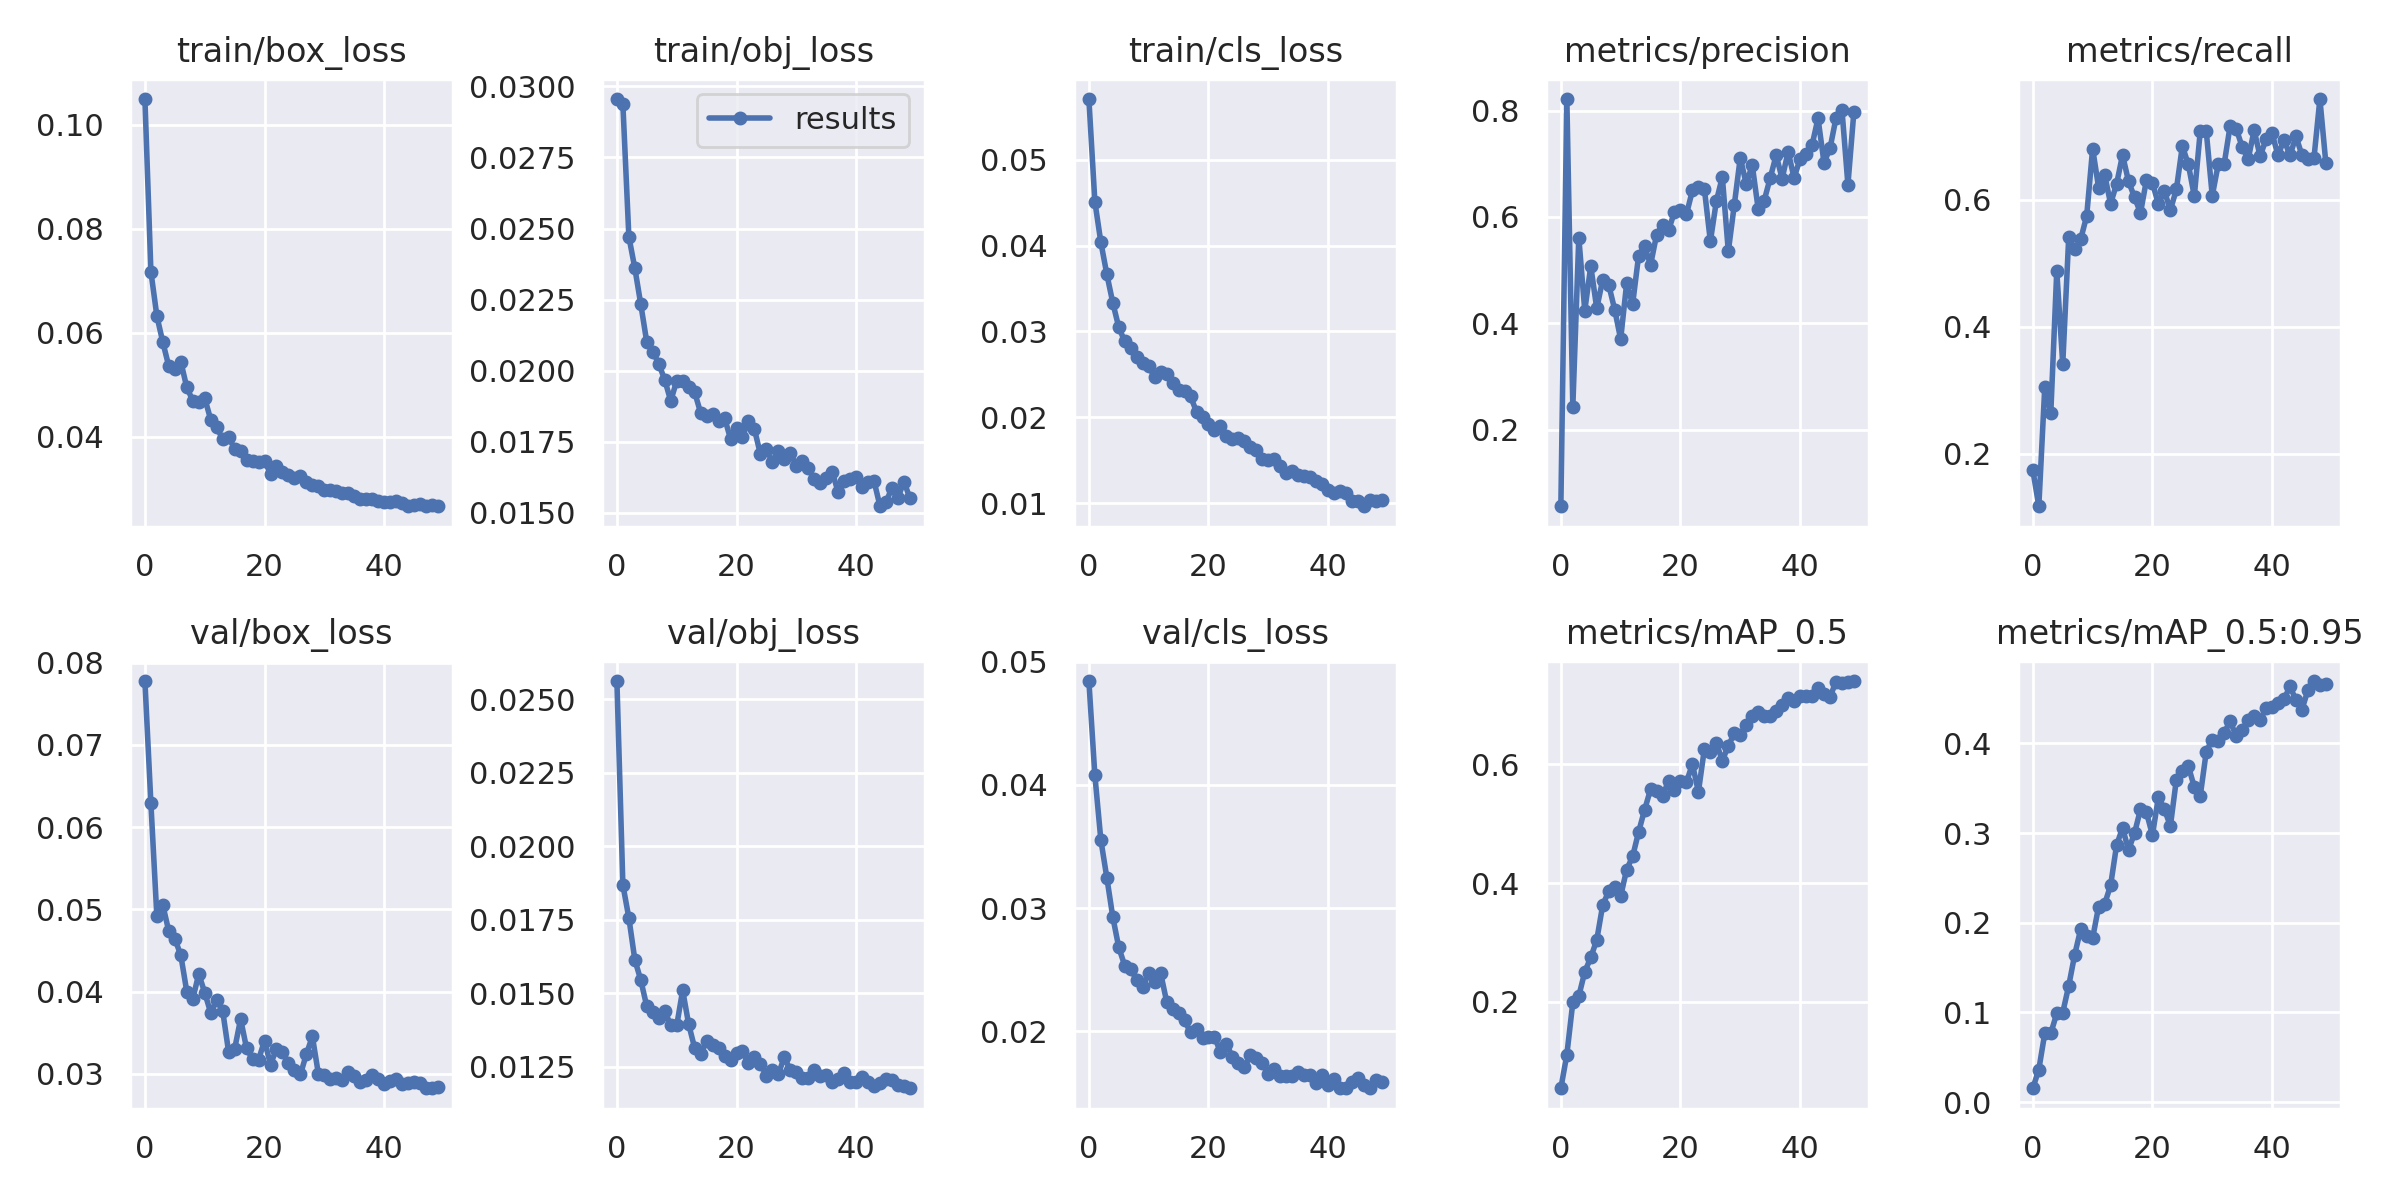

In [ ]:
# menentukan plot sebagai gambar
from IPython.display import Image

# menampilkan results.png
Image(filename='/content/yolov5/runs/train/hasil_yolov5s/results.png', width=1000)

# Detection
### Run inference pada checkpoint test/images di folder dataset

In [ ]:
!python detect.py --weights ./runs/train/hasil_yolov5s/weights/best.pt --img 416 --conf 0.5 --source /content/vehicle_dataset/test/images/

detect: weights=['./runs/train/hasil_yolov5s/weights/best.pt'], source=/content/vehicle_dataset/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-190-ge7bf382 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7031701 parameters, 0 gradients, 15.9 GFLOPs
image 1/200 /content/vehicle_dataset/test/images/Highway_1027_2020-07-30_jpg.rf.d45c3f59b79b8b157b59c2032b3eae09.jpg: 416x416 3 cars, 2 motorcycles, Done. (0.014s)
image 2/200 /content/vehicle_dataset/test/images/Highway_1034_2020-07-30_jpg.rf.acf4e4a670aa5e7618001c6a8bb3b91a.jpg: 416x416 3 cars, 3 motorcycles, Done. (0.014s)
image 3/200 /cont

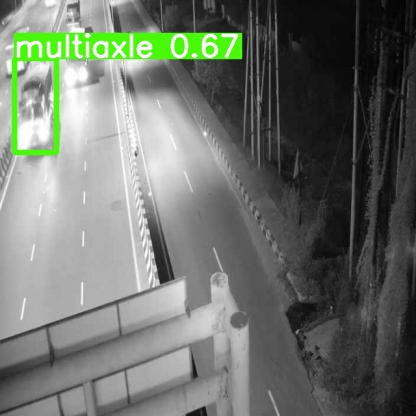

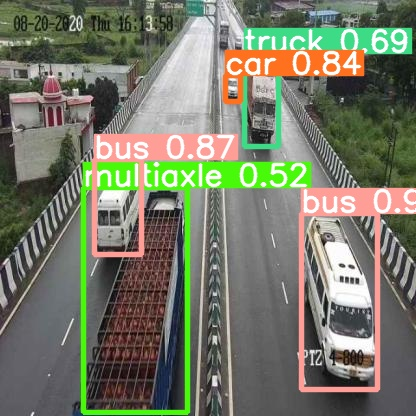

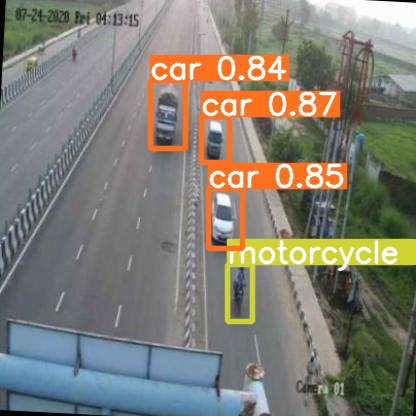

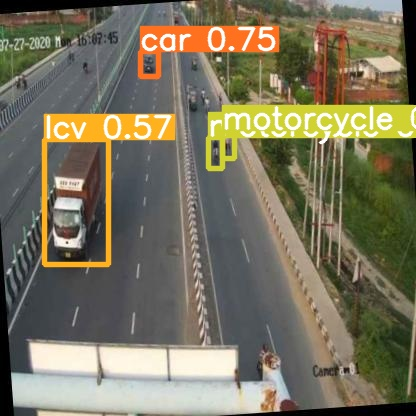

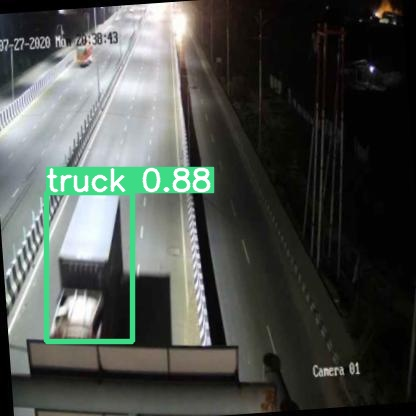

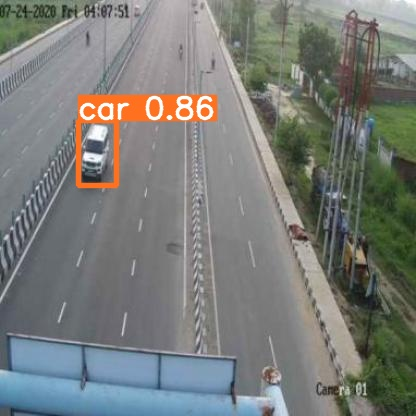

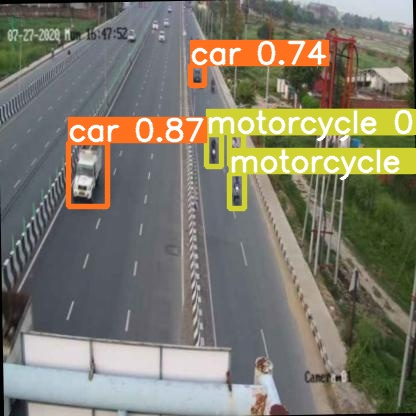

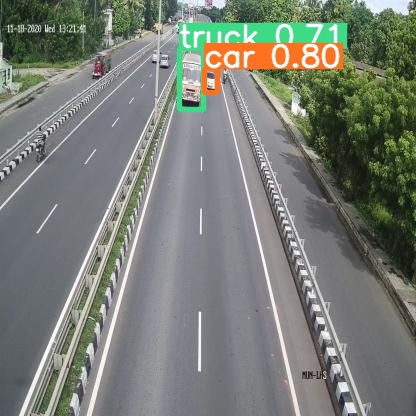

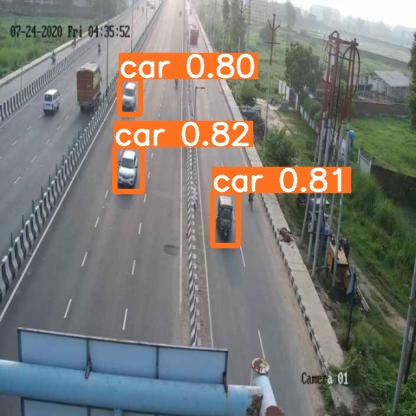

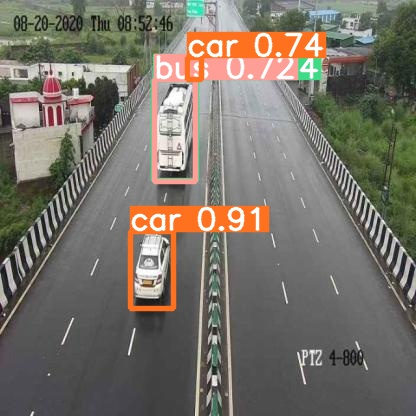

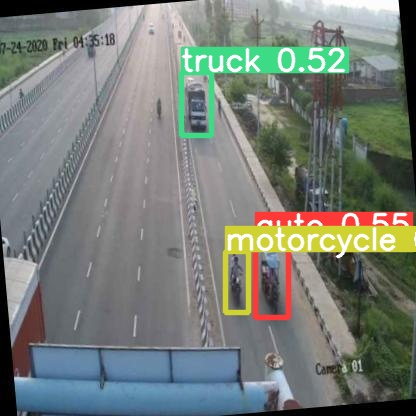

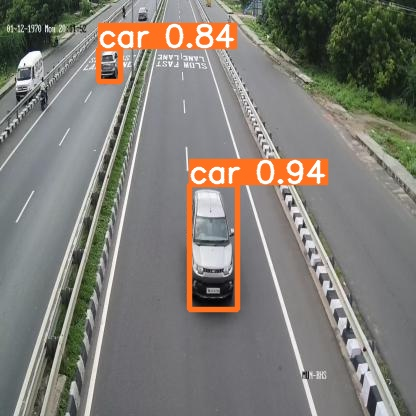

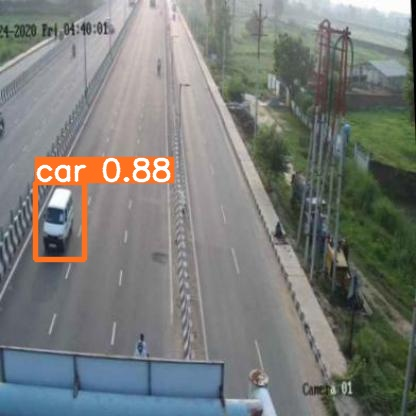

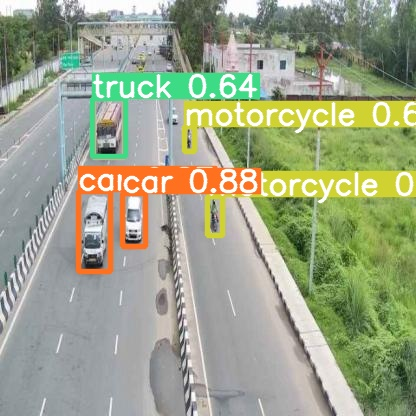

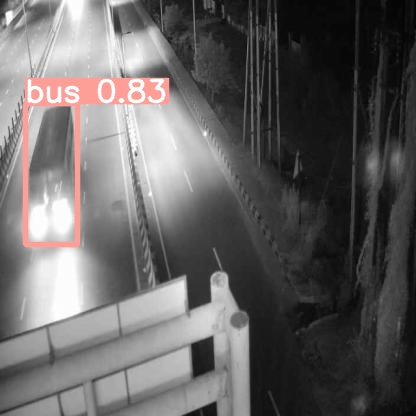

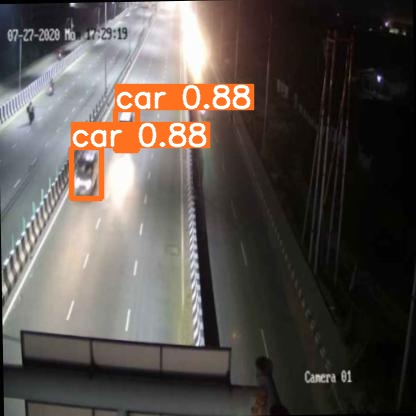

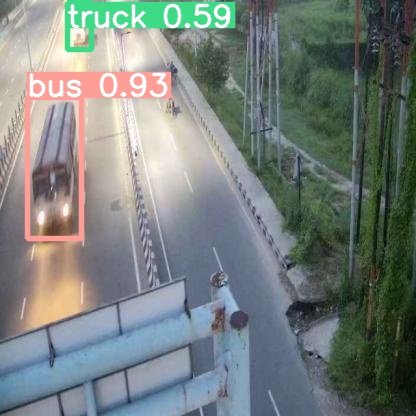

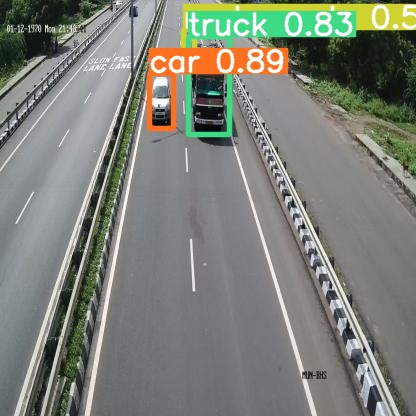

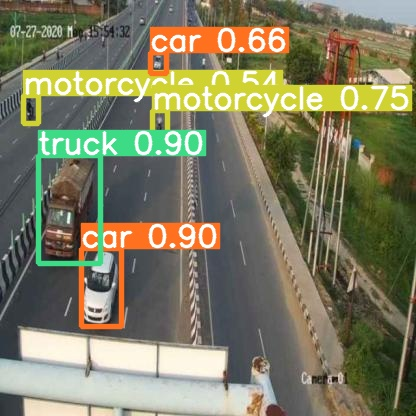

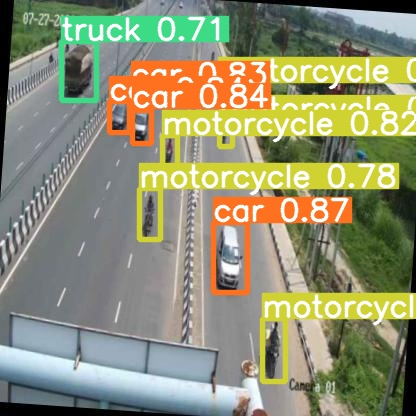

In [ ]:
# menampilkan inference pada semua gambar uji pada dataset
import glob
from IPython.display import Image, display

i = 0
for imageName in glob.glob('./runs/detect/exp/*.jpg'): # dengan asumsi menggunakan format .jpg
    display(Image(filename=imageName))
    print("\n")

    i += 1
    if i == 20:
      break